In [26]:
import os
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from lime import lime_image
import numpy as np
from skimage.segmentation import mark_boundaries
%matplotlib inline

In [27]:
data_dir = "../input/New Plant Diseases Dataset"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)
print(diseases)
print(len(diseases))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [28]:
PATH = './plant38_AlexNet_full.pth'
model = torch.load(PATH)
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=9216, out_features=2048, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=2048, out_features=512, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_featur

In [29]:
def predict_image(img, model):
    xb = img.unsqueeze(0).cuda()
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train.classes[preds[0].item()]

In [30]:
transform= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
batch_size = 64
train = ImageFolder(train_dir, transform=transform)
valid = ImageFolder(valid_dir, transform=transform) 
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=0, pin_memory=True)

In [31]:
test_dir = data_dir + "/test"
test = ImageFolder(test_dir, transform=transform)
test_images = sorted(os.listdir(test_dir+"/test"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


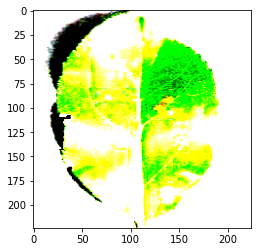

In [32]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [33]:
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust 0
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust 1
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust 2
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust 3
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab 4
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab 5
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab 6
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_ 7
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_ 8
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_ 9
Label: CornGrayLeafSpot.JPG , Predicted: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 10
Label: PeachBacterialSpot.JPG , Predicted: Peach___Bacterial_spot 11
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight 12
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight 13
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Ea

In [34]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


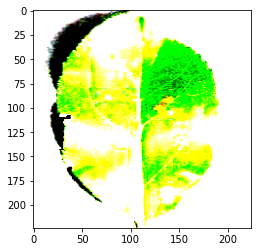

In [35]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [36]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [37]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

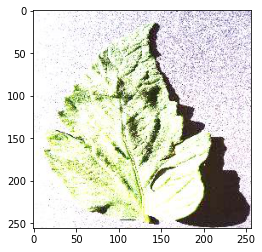

In [38]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
        
img = get_image(data_dir+'/test/test/TomatoHealthy4.JPG')
plt.imshow(img)

In [14]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

34

  0%|          | 0/1000 [00:00<?, ?it/s]

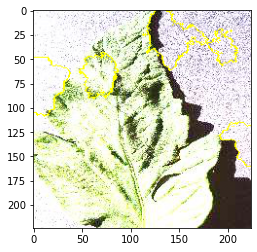

In [15]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

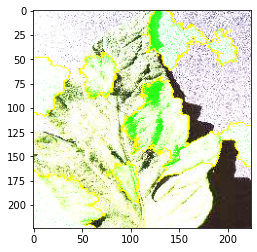

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

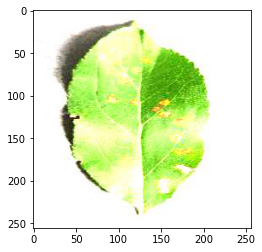

In [39]:
img = get_image(data_dir+'/test/test/AppleCedarRust1.JPG')
plt.imshow(img)

In [40]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

2

  0%|          | 0/1000 [00:00<?, ?it/s]

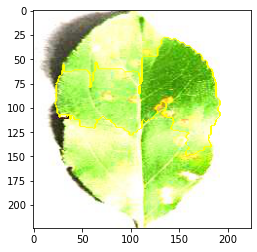

In [41]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=1, 
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

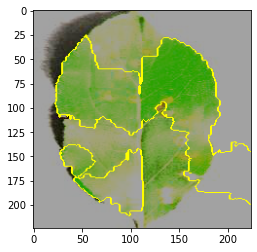

In [44]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/400.0, mask)
plt.imshow(img_boundry2)